In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

months = [*range(1, 13)]
sales = [5384, 8081, 10282, 9156, 6118, 9139,
         12460, 10717, 7825, 9693, 15177, 10990]

data = {'months' : [*range(1, 13)],'sales':[5384, 8081, 10282, 9156, 6118, 9139, 12460, 10717, 7825, 9693, 15177, 10990]}
df = pd.DataFrame(data)

# df.sales.rolling(3).mean()
# df['rolling_mean'] = df['sales'].rolling(3).mean()
df

# plt.plot(months, sales, label="Actual", color="Blue", marker='o')
# plt.legend()
# plt.xlabel('Period')
# plt.ylabel('Sales')
# plt.xticks([i for i in range(1,len(months)+1,1)])
# plt.show()

,months,sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118
5,6,9139
6,7,12460
7,8,10717
8,9,7825
9,10,9693


In [2]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'3MMA'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

month13 = (9693+15177+10990)/3
month14 = (15177+10990+month13)/3
month15 = (10990+month13+month14)/3

df2 = pd.DataFrame({"months":[13, 14, 15],
                    "sales":[np.nan, np.nan, np.nan],
                   "3MMA":[month13, month14, month15]})

df = df.append(df2, ignore_index=True)
df

,months,sales,3MMA
0,1,5384.0,NaN
1,2,8081.0,NaN
2,3,10282.0,NaN
3,4,9156.0,7915.700000
4,5,6118.0,9173.000000
5,6,9139.0,8518.700000
6,7,12460.0,8137.700000
7,8,10717.0,9239.000000
8,9,7825.0,10772.000000
9,10,9693.0,10334.000000


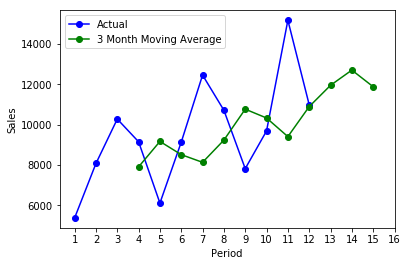

In [3]:
plt.plot(df['months'],df['sales'],label="Actual", color="Blue", marker='o')
plt.plot(df['months'],df['3MMA'],label='3 Month Moving Average', color="Green", marker='o')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.xticks([k for k in range(1,16+1,1)])
plt.legend()

In [4]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+1],'a=0.8'] = np.round((df.iloc[i,2])+ 0.8*((df.iloc[i,1])-(df.iloc[i,2])),1)
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+1],'a=0.2'] = np.round((df.iloc[i,2])+ 0.2*((df.iloc[i,1])-(df.iloc[i,2])),1)

df

,months,sales,3MMA,a=0.8,a=0.2
0,1,5384.0,NaN,NaN,NaN
1,2,8081.0,NaN,NaN,NaN
2,3,10282.0,NaN,NaN,NaN
3,4,9156.0,7915.700000,NaN,NaN
4,5,6118.0,9173.000000,8907.9,8163.8
5,6,9139.0,8518.700000,6729.0,8562.0
6,7,12460.0,8137.700000,9014.9,8642.8
7,8,10717.0,9239.000000,11595.5,9002.2
8,9,7825.0,10772.000000,10421.4,9534.6
9,10,9693.0,10334.000000,8414.4,10182.6


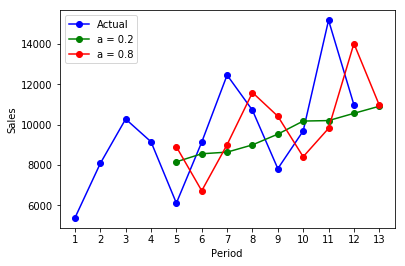

In [5]:
plt.plot(df['months'],df['sales'],label="Actual", color="Blue", marker='o')
plt.plot(df['months'],df['a=0.2'],label='a = 0.2', color="Green", marker='o')
plt.plot(df['months'],df['a=0.8'],label='a = 0.8', color="Red", marker='o')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.xticks([k for k in range(1,13+1,1)])
plt.legend()

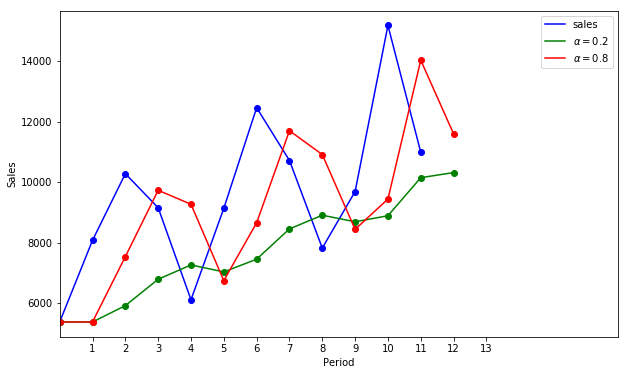

In [6]:
import os
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = SimpleExpSmoothing(df[['sales']]).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df[['sales']]).fit(smoothing_level=0.8,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.8$')

ax = df['sales'].plot(marker='o', color='blue', figsize=(10,6), legend=True)
fcast1.plot(marker='o', ax=ax, color='green', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.xticks([k for k in range(1,13+1,1)])
plt.show()

In [8]:
# Months 1-4
months_cycle1 = 5384+8081+10282+9156

# Months 5-8
months_cycle2 = 6118+9139+12460+10717

# Months 9-12
months_cycle3 = 7825+9693+15177+10990

data2 = {'month_cycles' : [*range(1, 4)],'sales':[months_cycle1, months_cycle2, months_cycle3]}
df2 = pd.DataFrame(data2)
df2

,month_cycles,sales
0,1,32903
1,2,38434
2,3,43685


In [24]:
season = np.array([1,2,3])
avg_arr = np.array([df2.iloc[0,1], df2.iloc[1,1], df2.iloc[2,1]])
fit = np.polyfit(season, avg_arr, 3)
poly = np.poly1d(fit)
average_predict = poly(4)
print(average_predict)

38434
48155.2312214239


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
